In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Dataset

In [2]:
data = pd.read_csv("Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Knowing The Dataset

There are a total of 7043 entries in our Dataset having class labels as Churn Yes or Churn No 

1).  customerID, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,
StreamingTV, StreamingMovies, Contract, PaymentMethod: Nominal Attributes <br/>
2).  gender, SeniorCitizens, Partner, Dependents, PhoneService, PaperlessBilling, Churn: Symmetric Binary Attributes <br/>
3).  Tenure, MonthlyCharges, TotalCharges: Numeric Attributes
<br/>
So Total (3) Numeric, (7) Binary and (11) Nominal Attributes present in the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Preprocessing

# Data Cleaning

In [4]:
ll = list(data[data["TotalCharges"]==' '].index)

There are 11 entries where Total Charges is empty so we drop those entries from the dataset

In [5]:
ll

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [6]:
data.drop(ll,inplace=True,axis=0)

In [7]:
data.shape

(7032, 21)

From the data info we can see that Total charges is of the object type so we convert it to the numeric type

In [8]:
temp = pd.to_numeric(data.TotalCharges)
data['TotalCharges'] = temp

No null values in the dataset

In [9]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The ID column is redundant column with no use in data understanding so we drop the ID column

In [10]:
data = data.drop(["customerID"],axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


No of unique values in each of the attribute

In [11]:
data.nunique(axis=0)

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [12]:
ll = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for cn in ll:
    print("Unique Values in "+str(cn))
    print(data[cn].unique())

Unique Values in PhoneService
['No' 'Yes']
Unique Values in MultipleLines
['No phone service' 'No' 'Yes']
Unique Values in InternetService
['DSL' 'Fiber optic' 'No']
Unique Values in OnlineSecurity
['No' 'Yes' 'No internet service']
Unique Values in OnlineBackup
['Yes' 'No' 'No internet service']
Unique Values in DeviceProtection
['No' 'Yes' 'No internet service']
Unique Values in TechSupport
['No' 'Yes' 'No internet service']
Unique Values in StreamingTV
['No' 'Yes' 'No internet service']
Unique Values in StreamingMovies
['No' 'Yes' 'No internet service']
Unique Values in Contract
['Month-to-month' 'One year' 'Two year']
Unique Values in PaperlessBilling
['Yes' 'No']
Unique Values in PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [13]:
matrix = pps.matrix(data).pivot(columns='x',index='y',values='ppscore')
#sns.heatmap(matrix,annot=True,cmap="Blues")

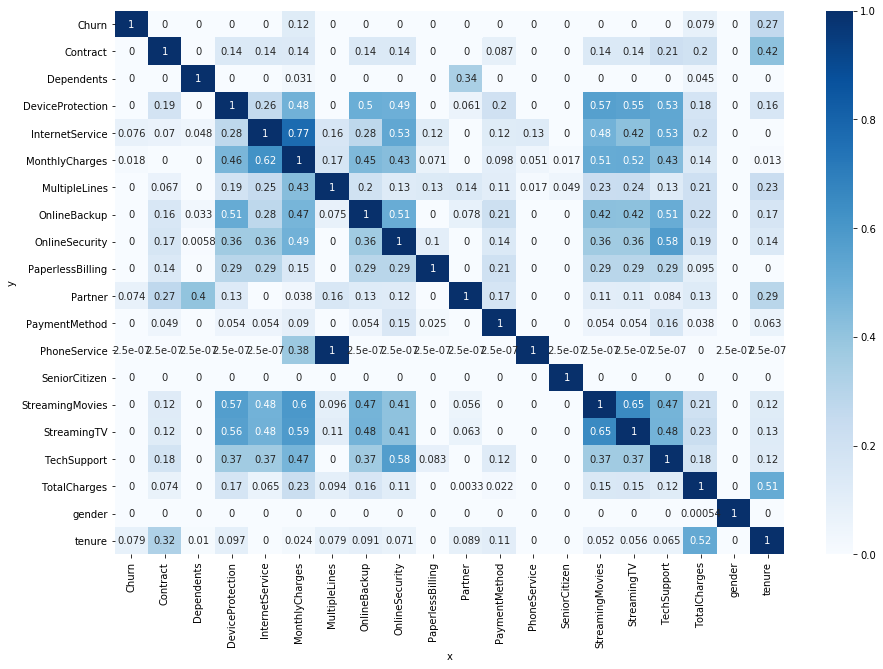

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(matrix,annot=True,cmap="Blues")

In [15]:
data.loc[data['SeniorCitizen']==1,'SeniorCitizen']="Yes"
data.loc[data['SeniorCitizen']==0,'SeniorCitizen']="No"

In [16]:
cat_attributes = list(data.columns)
cat_attributes
cat_attributes = ['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling']

In [17]:
list(enumerate(cat_attributes))

[(0, 'gender'),
 (1, 'SeniorCitizen'),
 (2, 'Partner'),
 (3, 'Dependents'),
 (4, 'PhoneService'),
 (5, 'MultipleLines'),
 (6, 'InternetService'),
 (7, 'OnlineSecurity'),
 (8, 'OnlineBackup'),
 (9, 'DeviceProtection'),
 (10, 'TechSupport'),
 (11, 'StreamingTV'),
 (12, 'StreamingMovies'),
 (13, 'Contract'),
 (14, 'PaperlessBilling')]

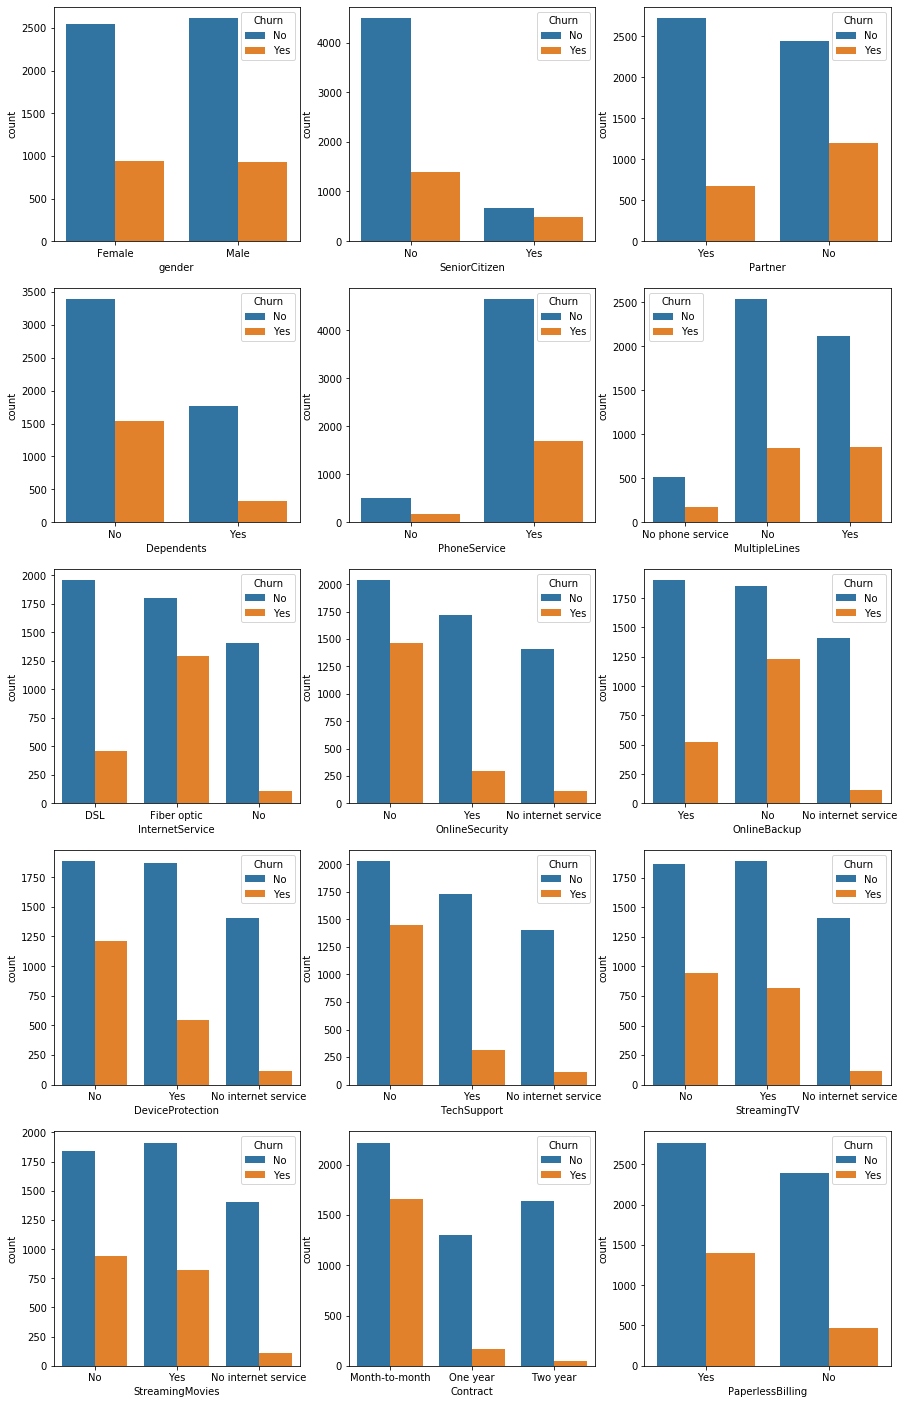

In [18]:
rows = 5
cols = 3
plt.figure(figsize=(15,25))
for cn,cn_name in enumerate(cat_attributes):
    plt.subplot(rows,cols,cn+1)
    sns.countplot(cn_name,hue="Churn",data=data)

Observations from the above Countplots:<br/>

1).  Churn Rate for Senior Citizens is high as compared to Non Senior Citizens (subplot 2)<br/>

2).  For the people having partners or dependents have a lower Churn Rate as compared to people with No Partners or No      dependents (subplot 3 & 4)<br/>

3).  Out of the two Internet Services people having Fiber Optic have a higher Churn Rate as compared to people having        DSL (subplot 7) <br/>
<p style='text-align: right:'>4).   People using one or more of the additional services (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,      StreamingTV, StreamingMovies) have a lower Churn Rate as compared to people with no subscription to the additional      services 
</p>

5).  Customers with longer contract term i.e. one year or two year contract have a lower Churn Rate as compared to those with month-to-month contracts.

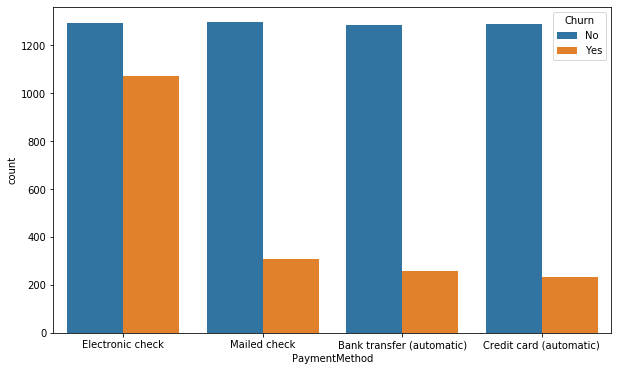

In [19]:
plt.figure(figsize = (10,6))
sns.countplot('PaymentMethod',hue='Churn',data=data)

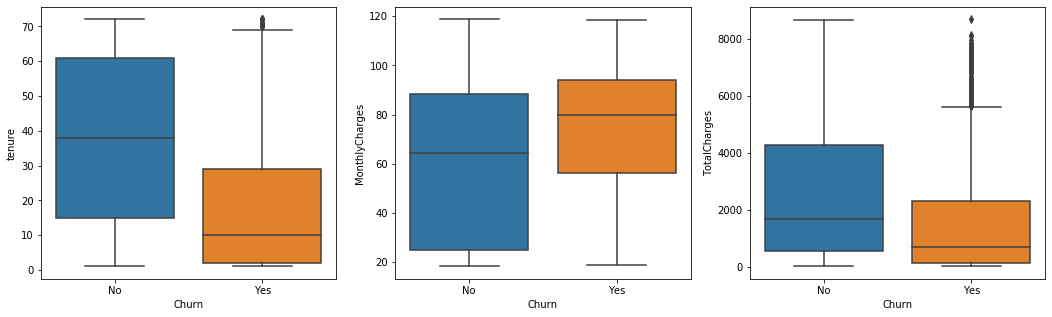

In [20]:
num_attributes = ["tenure","MonthlyCharges","TotalCharges"]
rows=1
cols=3
plt.figure(figsize=(18,5))
for cn,cn_name in enumerate(num_attributes):
    plt.subplot(rows,cols,cn+1)
    sns.boxplot(x="Churn",y=cn_name,data=data)

Observations from above boxplots:<br/>

1).  Customers associated with the company for a longer duration have a lower churn rate for them the median of tenure lies between 35-40 whereas for the Churn yes customers that range of median is down to 10-15 <br/>

2).  Customers having a higher monthly charges have higher Churn Rate as and the median of charges lies close to 80 dollars whereas for the non churning customers the median of monthly charges is close to 70 dollars<br/>

3).  An interesting observation comes in subplot 3 where we can see that the Total Charges of Non Churning Customers is      higher as compared to Churning Customers. Median for non Churning Customers is close to 2000 dollars and that of        Churning Customers is close to 1000 dollars

NO Outliers Detected in the dataset using the IQR Method

In [21]:
Q1 = data[num_attributes].quantile(0.25)
Q3 = data[num_attributes].quantile(0.75)
IQR = Q3-Q1
x = (data[num_attributes]<Q1-1.5*IQR) | (data[num_attributes]>Q3+1.5*IQR)
x = pd.DataFrame(x)
x.any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

From the earlier observations in the countplot we observed that the Customers having subscribed to more Number of additional services are more likely to stay with the company and not Churn so we create a new attribute count_of_services_used to accomodate that data understanding in our analysis 

In [22]:
data["count_of_services_used"] = (data[['OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies','InternetService']]!="No").sum(axis=1)

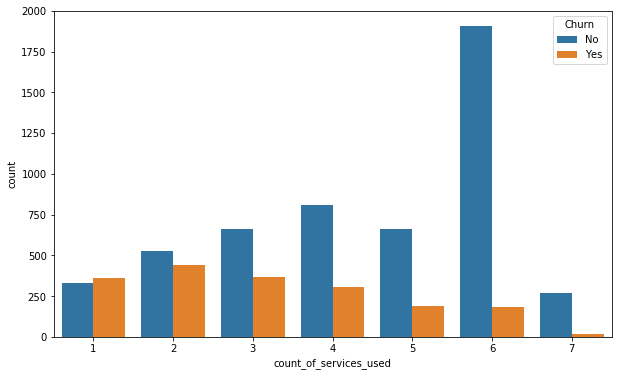

In [23]:
plt.figure(figsize=(10,6))
sns.countplot('count_of_services_used',hue="Churn",data=data)

In [24]:
X_cat = data[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 
             'MultipleLines', 'InternetService', 'OnlineSecurity',
             'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
             'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','count_of_services_used']].copy()
Y_cat = data['Churn'].copy()
X_cat.shape

(7032, 17)

In [25]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for cn in X_cat:
    X_cat[cn] = label_encoder.fit_transform(X_cat[cn])

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func = chi2,k=17)
fit = bestfeatures.fit(X_cat,Y_cat)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_cat.columns)
dfpscores = pd.DataFrame(fit.pvalues_)
featureScores = pd.concat([dfcolumns,dfscores,dfpscores],axis=1)
featureScores.columns = ['Specs','Scores','pvalues']
print(featureScores.sort_values('Scores',ascending=False))

                     Specs       Scores        pvalues
13                Contract  1111.759054  9.186154e-244
16  count_of_services_used   896.858524  4.728693e-197
7           OnlineSecurity   550.437364  1.011220e-121
10             TechSupport   522.164716  1.430807e-115
8             OnlineBackup   229.441123   7.892689e-52
9         DeviceProtection   190.688004   2.249863e-43
1            SeniorCitizen   133.482766   7.089546e-31
3               Dependents   131.271509   2.159540e-30
14        PaperlessBilling   104.979224   1.234232e-24
2                  Partner    81.857769   1.462409e-19
15           PaymentMethod    59.240507   1.395318e-14
5            MultipleLines     9.735960   1.806976e-03
6          InternetService     9.715269   1.827433e-03
12         StreamingMovies     8.357624   3.840725e-03
11             StreamingTV     7.373234   6.620176e-03
0                   gender     0.254297   6.140655e-01
4             PhoneService     0.092948   7.604618e-01
